# 町田市周辺の遮光率の算出
- 雲天による遮光率の実データの整形
    - 遮光率１：完全に雲
    - 遮光率０：晴天
- $\text{遮光率} = 1 - \frac{\text{全天日射量}}{\text{大気外日射量}}$
- 全天日射量は実データが存在する．CropTotalRadiation.pyによって対象領域（町田市周辺）のデータを抜き出す．
- 大気外日射量は日付と時刻によって算出される．OuterRadiation.pyによってこれを算出する．
- 対象領域（$30\times30$のグリッド）
    - 北緯 : 35.405° - 35.695°
    - 東経 : 139.245° - 139.535°
    - 時刻：2016年8月20日10時−12時の二時間
        - ２分半ごとにデータが存在するため，計49フレームを保持する．

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

import sys, os
sys.path.append(os.pardir)
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pdb
import time
from tqdm import tqdm
from Slackutil.SendMessage import SendMessage

from FixData.OuterRadiation import OuterRadiation
from FixData.CropTotalRadiation import CropTotalRadiation


In [15]:
# target area : 40*40 square around Machida city
# N : 35.405 - 35.695
# E : 139.245 - 139.535
latitude = np.arange(start = 35.355, stop = 35.745, step = 0.01)
longitude = np.arange(start = 139.195, stop = 139.585, step = 0.01)
start_date = np.array([2016, 8, 20, 9, 0])
end_date = np.array([2016, 8, 20, 12, 0])

outer = OuterRadiation(latitude = latitude,
                      longitude = longitude,
                      date = start_date)
crop = CropTotalRadiation(latitude = latitude,
                         longitude = longitude,
                         start_date = start_date,
                         end_date = end_date)

In [17]:
OuterResult = outer.compute(number=73)

In [18]:
CropResult = crop.Crop()

In [19]:
ShadeRatio = 1. - CropResult / np.array(OuterResult)

In [22]:
ShadeRatio.shape

(73, 40, 40)

In [20]:
crop.pathlist[0].split('.')[0]

'201608200900jp01'

In [23]:
with open('/Users/Daigo/Data/ShadeRatio/Machida3h/OuterResult.pkl', 'wb') as f:
    pickle.dump(OuterResult, f)
with open('/Users/Daigo/Data/ShadeRatio/Machida3h/CropResult.pkl', 'wb') as f:
    pickle.dump(CropResult, f)
with open('/Users/Daigo/Data/ShadeRatio/Machida3h/ShadeRatio.pkl', 'wb') as f:
    pickle.dump(ShadeRatio, f)

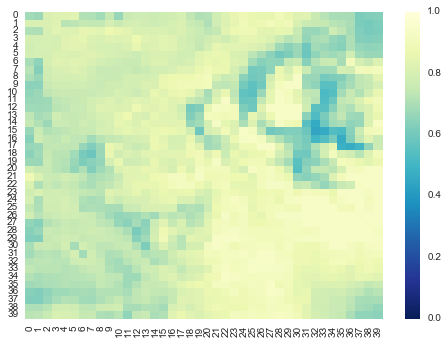

In [21]:
sns.heatmap(ShadeRatio[24], annot=False, 
            vmin = 0, vmax = 1,
            fmt='g', cmap = 'YlGnBu_r')
sns.plt.show()

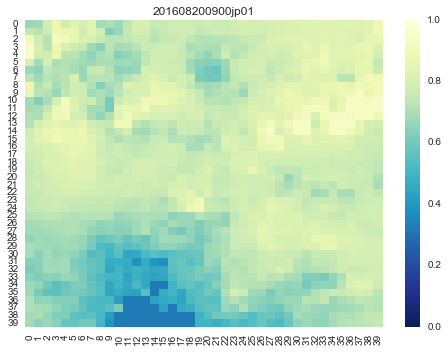

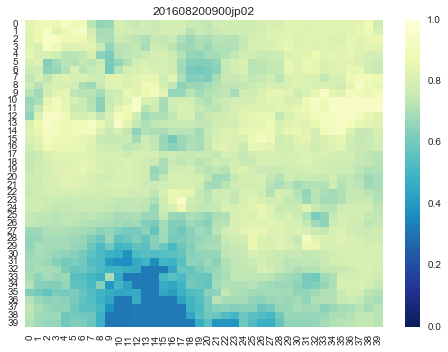

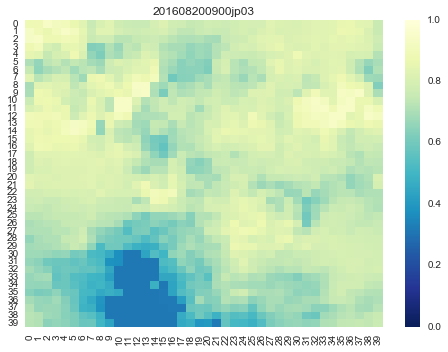

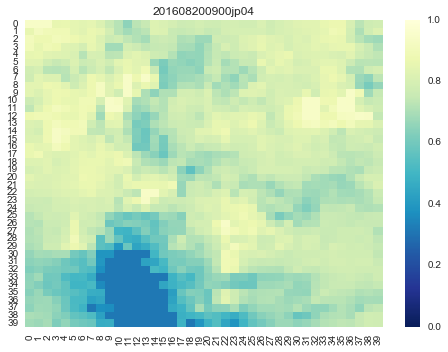

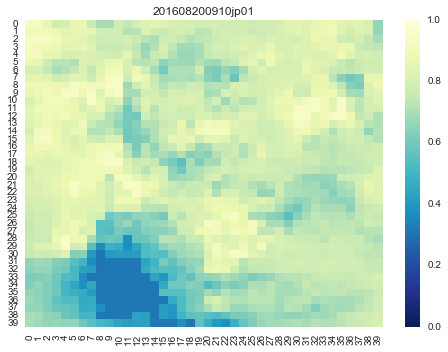

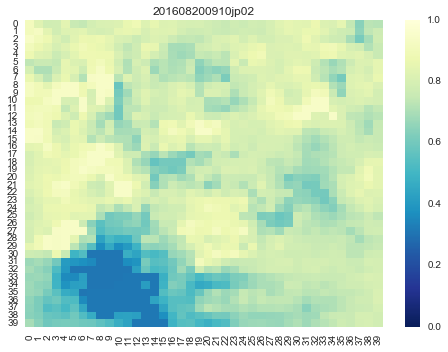

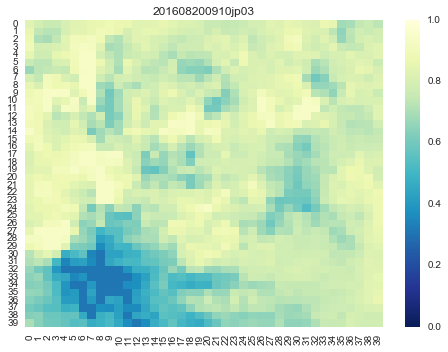

In [ ]:
for i, shade in enumerate(ShadeRatio):
    sns.plt.title(crop.pathlist[i].split('.')[0])
    sns.heatmap(shade, annot=False,
               vmin = 0, vmax = 1.,
               fmt = 'g', cmap = 'YlGnBu_r')
    sns.plt.savefig('/Users/Daigo/Data/ShadeRatio/Machida3h/' + str(i) + '.png')
    sns.plt.show()
    
    

In [3]:
with open('/Users/Daigo/Data/ShadeRatio/Machida3h/ShadeRatio.pkl', 'rb') as f:
    ShadeRatio = pickle.load(f) # shape(73, 30, 30)

In [36]:

time_range = np.arange(start = 9, stop = 12+2.5/60, step = 2.5/60)
'''
for i in range(30):
    for j in range(30):
        Shade_series = ShadeRatio[:, j, i]
        plt.title('2016/8/20 E:' + str(longitude[i]) + ', N:' + str(latitude[::-1][j]))
        plt.plot(time_range, Shade_series)
        filename = '/Users/Daigo/Data/ShadeRatio/Machida3h/TimeSeries/'+ str(longitude[i]) \
                    + '_' + str(latitude[::-1][j]) + '.png'
        plt.savefig(filename)
        plt.show()
'''

"\nfor i in range(30):\n    for j in range(30):\n        Shade_series = ShadeRatio[:, j, i]\n        plt.title('2016/8/20 E:' + str(longitude[i]) + ', N:' + str(latitude[::-1][j]))\n        plt.plot(time_range, Shade_series)\n        filename = '/Users/Daigo/Data/ShadeRatio/Machida3h/TimeSeries/'+ str(longitude[i])                     + '_' + str(latitude[::-1][j]) + '.png'\n        plt.savefig(filename)\n        plt.show()\n"

In [38]:
! git add ImportRealData.ipynb
! git commit -m 'figure output'
! git push

[master 396b0af] figure output
 1 file changed, 7 insertions(+), 8 deletions(-)
Counting objects: 4, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 556 bytes | 0 bytes/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/daigo0927/pyworks
   c4af6f8..396b0af  master -> master
